In [1]:
import pandas as pd
new_df = pd.read_excel("combined_full.xlsx")

In [2]:
cp_merge = new_df.groupby(['ited','sized','type']).agg({
    'obj': 'mean',
    'time': 'mean'
}).reset_index()

# Display the result
cp_merge

,ited,sized,type,obj,time
0,5,5,100,0.057989,5.515491
1,5,5,200,0.054042,28.125867
2,5,5,400,0.049682,128.672764
3,5,10,100,0.058418,7.843684
4,5,10,200,0.054011,36.893953
5,5,10,400,0.050441,161.738053
6,5,20,100,0.057709,12.526508
7,5,20,200,0.054283,54.903233
8,5,20,400,0.050124,228.382168
9,5,30,100,0.058641,17.276029


ValueError: keyword fontweight is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

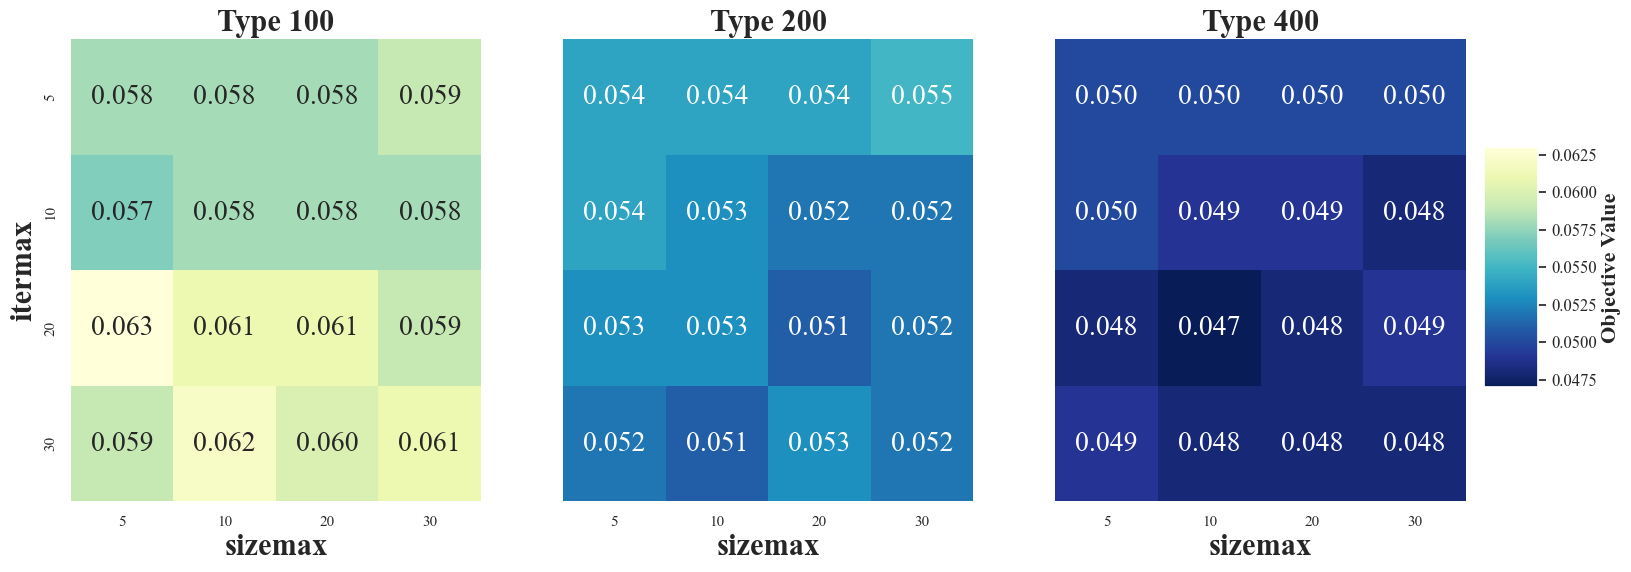

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="Times New Roman")
# Round 'obj' values to 3 decimal places
cp_merge['obj'] = cp_merge['obj'].round(3)

# Aggregate 'obj' values by the mean for each unique combination of 'type', 'sized', and 'ited'
new_df = cp_merge.groupby(['type', 'sized', 'ited'], as_index=False).agg({'obj': 'mean'})

# Pivot data for each type to use in heatmap
heatmap_data = {}
types = new_df['type'].unique()
for t in types:
    subset = new_df[new_df['type'] == t].pivot(index='ited', columns='sized', values='obj')
    heatmap_data[t] = subset

# Find the global min and max values across all heatmap data for consistent color scaling
min_val = min(subset.min().min() for subset in heatmap_data.values())
max_val = max(subset.max().max() for subset in heatmap_data.values())

# Plotting heatmaps with a shared color bar and consistent color scale
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])  # Position for the shared color bar

for i, t in enumerate(types):
    sns.heatmap(heatmap_data[t], annot=True, fmt=".3f", cmap="YlGnBu_r", ax=axs[i],
                cbar=i == 0, cbar_ax=None if i else cbar_ax,
                vmin=min_val, vmax=max_val,
                annot_kws={"fontsize": 20, "fontname": "Times New Roman"})  # Use global min and max for consistent color scaling
    axs[i].set_title(f"Type {t}", fontsize=22, fontname="Times New Roman", fontweight='bold')
    axs[i].set_xlabel("sizemax", fontsize=22, fontname="Times New Roman", fontweight='bold')
    axs[i].set_ylabel("itermax" if i == 0 else "", fontsize=22, fontname="Times New Roman", fontweight='bold')

cbar = fig.colorbar(axs[0].collections[0], cax=cbar_ax)
cbar.set_label("Objective Value", fontsize=16, fontname="Times New Roman", fontweight='bold')
cbar.ax.tick_params(labelsize=12)
cbar.ax.yaxis.set_tick_params(labelsize=12, labelcolor='black', labelrotation=0, fontweight='bold')

plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust layout to fit color bar

# Customize tick label font sizes
for ax in axs:
    ax.tick_params(labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=22, fontname="Times New Roman", fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22, fontname="Times New Roman", fontweight='bold')

plt.savefig("CP_heatmap.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()


C:\Users\Admin\AppData\Local\Temp/ipykernel_1920/292865385.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust layout to fit color bar


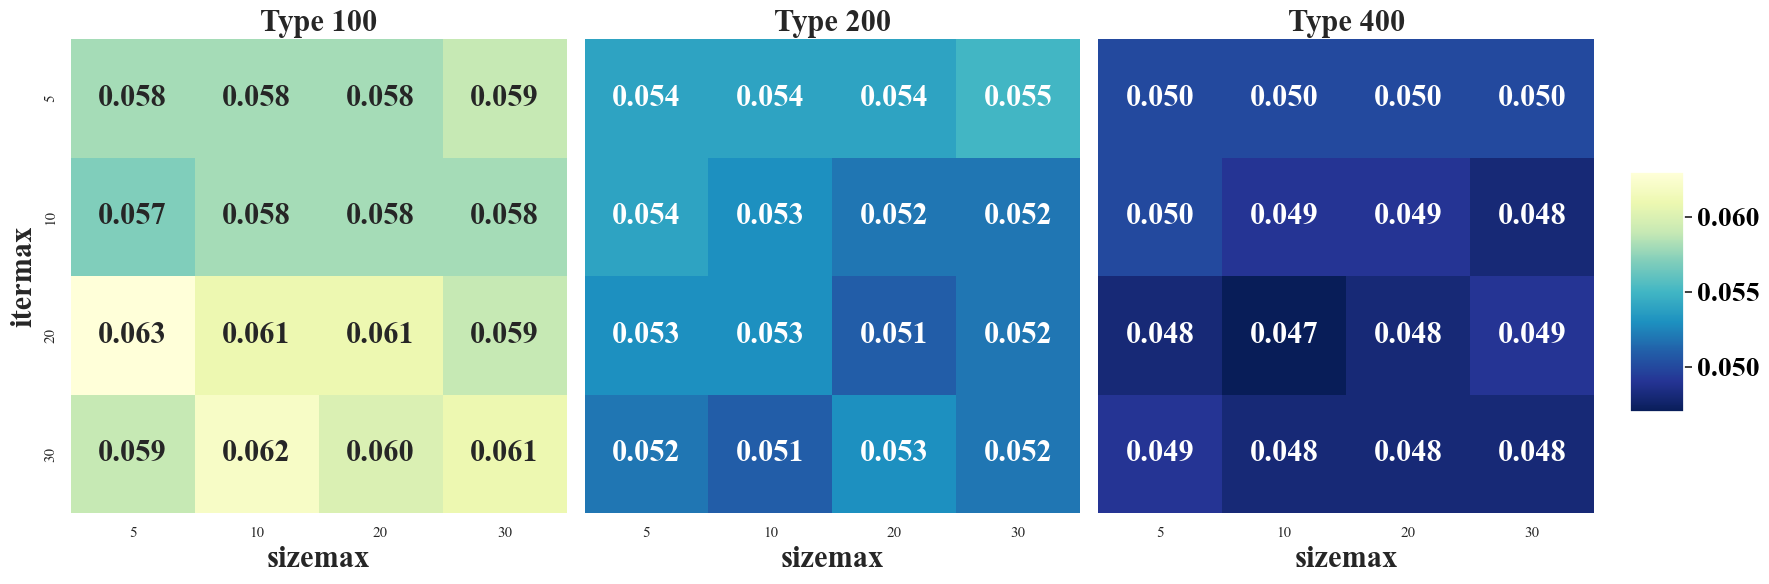

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="Times New Roman")
# Round 'obj' values to 3 decimal places
cp_merge['obj'] = cp_merge['obj'].round(3)

# Aggregate 'obj' values by the mean for each unique combination of 'type', 'sized', and 'ited'
new_df = cp_merge.groupby(['type', 'sized', 'ited'], as_index=False).agg({'obj': 'mean'})

# Pivot data for each type to use in heatmap
heatmap_data = {}
types = new_df['type'].unique()
for t in types:
    subset = new_df[new_df['type'] == t].pivot(index='ited', columns='sized', values='obj')
    heatmap_data[t] = subset

# Find the global min and max values across all heatmap data for consistent color scaling
min_val = min(subset.min().min() for subset in heatmap_data.values())
max_val = max(subset.max().max() for subset in heatmap_data.values())

# Plotting heatmaps with a shared color bar and consistent color scale
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])  # Position for the shared color bar

for i, t in enumerate(types):
    sns.heatmap(heatmap_data[t], annot=True, fmt=".3f", cmap="YlGnBu_r", ax=axs[i],
                cbar=i == 0, cbar_ax=None if i else cbar_ax,
                vmin=min_val, vmax=max_val,
                annot_kws={"fontsize": 22, "fontname": "Times New Roman", "fontweight": "bold"})  # Increase font size for annotations
    axs[i].set_title(f"Type {t}", fontsize=22, fontname="Times New Roman", fontweight='bold')
    axs[i].set_xlabel("sizemax", fontsize=22, fontname="Times New Roman", fontweight='bold')
    axs[i].set_ylabel("itermax" if i == 0 else "", fontsize=22, fontname="Times New Roman", fontweight='bold')

# Customize color bar font and bold
cbar = fig.colorbar(axs[0].collections[0], cax=cbar_ax)
# cbar.set_label("Objective Value", fontsize=20, fontname="Times New Roman", fontweight='bold')
cbar.ax.tick_params(labelsize=20, labelcolor='black')

# Set font weight for each tick label manually
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontname("Times New Roman")

plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust layout to fit color bar

# Customize tick label font sizes
for ax in axs:
    ax.tick_params(labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=22, fontname="Times New Roman", fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=22, fontname="Times New Roman", fontweight='bold')

plt.savefig("CP_heatmap.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Pivot the data to format it for the heatmap
heatmap_data = cp_100_merge.pivot(index="ited", columns="sized", values="obj")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.set(font="Times New Roman")  # Set default font for seaborn
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".6f",
    cmap="YlGnBu_r",
    annot_kws={"fontname": "Times New Roman", "fontsize": 15},  # Set font for numbers
    cbar_kws={'label': 'obj Value'},  # Set font for color bar label
)

# Adjust the title, x, and y labels font properties
# plt.title("Dataset 100", fontsize=19, fontname="Times New Roman", fontweight='bold')
plt.xlabel("sizemax", fontsize=16, fontname="Times New Roman",  fontweight='bold')
plt.ylabel("itermax", fontsize=16, fontname="Times New Roman",  fontweight='bold')

# Customize color bar label font
cbar = plt.gca().collections[0].colorbar
cbar.set_label("objective", fontsize=16, fontname="Times New Roman", fontweight='bold')

min_val, max_val = round(heatmap_data.min().min(), 3), round(heatmap_data.max().max(), 3)
cbar.set_ticks(np.linspace(min_val, max_val, 5))  # Set 5 evenly spaced ticks

plt.xticks(fontsize=14, fontname="Times New Roman",  fontweight='bold')  # Increase font size for x-axis tick labels
plt.yticks(fontsize=14, fontname="Times New Roman",  fontweight='bold')  # Increase font size for y-axis tick labels


plt.savefig("CP_100.pdf", format='pdf', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

ValueError: Index contains duplicate entries, cannot reshape